In [20]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


In [21]:
num_inputs=2
num_example=1000
true_w=[2,-3.4]
true_b=4.3
features=torch.randn(num_example,num_input,dtype=torch.float32)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
print(features[0],labels[0])

tensor([ 0.1839, -0.3802]) tensor(5.9407)


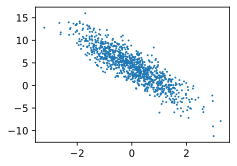

In [22]:
'''def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
  '''  
# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
import sys
sys.path.append("D:\CS\MachineLearning\Dive-into-DL-PyTorch-master\code")
from d2lzh_pytorch import *
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [23]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.1526,  0.4607],
        [-0.0994, -0.6277],
        [ 0.2679,  0.8714],
        [-0.1681,  1.2745],
        [ 0.3725,  1.1647],
        [ 1.6278,  0.2005],
        [-1.3114,  1.5597],
        [-0.2939,  1.3693],
        [-2.0935, -1.1241],
        [ 0.1897, -1.7925]]) tensor([ 2.4364,  6.2365,  1.8744, -0.3578,  1.1038,  6.8731, -3.6213, -0.9460,
         3.9387, 10.7851])


In [28]:
# 初始参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
#确保梯度为真，用来记录梯度
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [29]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [32]:
net=linreg
loss=squared_loss
lr=0.03
epochs=5
for epoch in range(epochs):
    for X, y in data_iter(batch_size, features, labels):
        l=loss(net(X,w,b),y).sum()
        l.backward() #对L求梯度
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)     
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))     

epoch 1, loss 0.042725
epoch 2, loss 0.000167
epoch 3, loss 0.000049
epoch 4, loss 0.000048
epoch 5, loss 0.000048


In [33]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9994],
        [-3.4002]], requires_grad=True)
4.3 
 tensor([4.2994], requires_grad=True)
